1.1 - Movielens full - EDA
Nu ska du ladda ned datasetet ml-latest.zip under sektionen "recommended for education and
development". Läs in dataseten "movies.csv" och "ratings.csv" besvara på följande frågorna nedan.
a) Gör en EDA för att förstå datasetet. Inkludera olika slags plots. Begränsa dig inte till frågorna nedan,
utan försök undersöka fler aspekter av datan

In [1]:
import pandas as pd

# Loading datasets
df_movies = pd.read_csv("../Data/ml-latest/movies.csv")
df_ratings = pd.read_csv("../Data/ml-latest/ratings.csv")



In [2]:
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
58093,193876,The Great Glinka (1946),(no genres listed)
58094,193878,Les tribulations d'une caissière (2011),Comedy
58095,193880,Her Name Was Mumu (2016),Drama
58096,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi


In [3]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


array([[<Axes: title={'center': 'userId'}>,
        <Axes: title={'center': 'movieId'}>],
       [<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'timestamp'}>]], dtype=object)

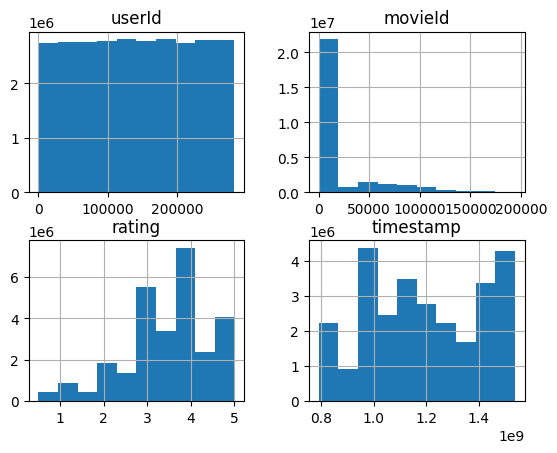

In [4]:
df_ratings.hist()

In [5]:
df_ratings.dropna(inplace=True)


b) Vilka är de 10 filmerna med flest ratings?

In [6]:
# exctracting top 10 movies base on value counts of movieId
ten_most = df_ratings["movieId"].value_counts().head(10)

print("--- Ten most ranked movies ---")
print()

for i, movie in enumerate(ten_most.index):
    print(f"{ten_most.iloc[i]} ratings - ", end="")
    print(df_movies.loc[movie]["title"])

--- Ten most ranked movies ---

97999 ratings - Strawberry and Chocolate (Fresa y chocolate) (1993)
97040 ratings - I Love Trouble (1994)
92406 ratings - Priest (1994)
87899 ratings - Wild Bunch, The (1969)
84545 ratings - Tarantula (1955)
81815 ratings - Ladybird Ladybird (1994)
76451 ratings - Lassie (1994)
71516 ratings - Secret Garden, The (1993)
68803 ratings - Rumble in the Bronx (Hont faan kui) (1995)
68469 ratings - Jumanji (1995)


c) Beräkna den genomsnittliga ratingen för dessa 10 filmerna med flest ratings.

In [7]:
print("--- Ratings of ten most ranked movies ---", end="\n\n")

# looping over the movieId of the top 10 movies
for movie in ten_most.index:
    print(round(df_ratings[df_ratings["movieId"] == movie]["rating"].mean(), 2), end = " - ")
    print(df_movies.loc[movie]["title"])


--- Ratings of ten most ranked movies ---

4.42 - Strawberry and Chocolate (Fresa y chocolate) (1993)
4.06 - I Love Trouble (1994)
4.17 - Priest (1994)
4.15 - Wild Bunch, The (1969)
4.15 - Tarantula (1955)
4.12 - Ladybird Ladybird (1994)
3.67 - Lassie (1994)
4.26 - Secret Garden, The (1993)
4.01 - Rumble in the Bronx (Hont faan kui) (1995)
3.89 - Jumanji (1995)


d) Gör en plot över årtal och antalet filmer representerade i datasetet.

In [8]:
import plotly.express as px


movies_year = df_movies
movies_year["year"] = df_movies["title"].str.extract(
    r"\((\d{4})\)"
)
# extracting digits from within parenthesis.
# Idea taken from Philip: https://github.com/Canesp/Machine-learning-Philip-de-Canesie/blob/main/Lab/recommend.ipynb

movies_per_year = movies_year.groupby("year").size().reset_index(name="count")

fig = px.bar(movies_per_year, x="year", y="count", title="Number of Movies per Year")
fig.show()


e) Gör en plot över antalet ratings mot movieId.

In [9]:
# creating new df with mean ratings (for later merge)

df_ratings_mean = df_ratings.groupby("movieId")["rating"].mean().reset_index(name="mean_rating")
df_ratings_mean

,movieId,mean_rating
0,1,3.886649
1,2,3.246583
2,3,3.173981
3,4,2.874540
4,5,3.077291
...,...,...
53884,193876,3.000000
53885,193878,2.000000
53886,193880,2.000000
53887,193882,2.000000


In [10]:
# creating new df with count of total ratings (for later merge)

df_ratings_count = df_ratings.groupby("movieId")["rating"].count().reset_index(name="count")
df_ratings_count

,movieId,count
0,1,68469
1,2,27143
2,3,15585
3,4,2989
4,5,15474
...,...,...
53884,193876,1
53885,193878,1
53886,193880,1
53887,193882,1


In [11]:
# merging df_ratings with above created dfs

df_ratings_merged = pd.merge(df_ratings, df_ratings_mean, how = "left", on = "movieId")
df_ratings_merged[df_ratings_merged["movieId"] == 318]

df_ratings_merged = pd.merge(df_ratings_merged, df_ratings_count, how = "left", on = "movieId")
df_ratings_merged

df_ratings_merged = pd.merge(df_ratings_merged, df_movies[["movieId", "title"]], how = "left", on = "movieId")
df_ratings_merged

,userId,movieId,rating,timestamp,mean_rating,count,title
0,1,307,3.5,1256677221,3.971727,7958,Three Colors: Blue (Trois couleurs: Bleu) (1993)
1,1,481,3.5,1256677456,3.339241,6037,Kalifornia (1993)
2,1,1091,1.5,1256677471,2.806207,6138,Weekend at Bernie's (1989)
3,1,1257,4.5,1256677460,3.828617,5902,Better Off Dead... (1985)
4,1,1449,4.5,1256677264,3.918378,6867,Waiting for Guffman (1996)
...,...,...,...,...,...,...,...
27753439,283228,8542,4.5,1379882795,3.966567,1002,"Day at the Races, A (1937)"
27753440,283228,8712,4.5,1379882751,3.856944,360,My Favorite Wife (1940)
27753441,283228,34405,4.5,1379882889,3.984000,12531,Serenity (2005)
27753442,283228,44761,4.5,1354159524,3.788885,2816,Brick (2005)


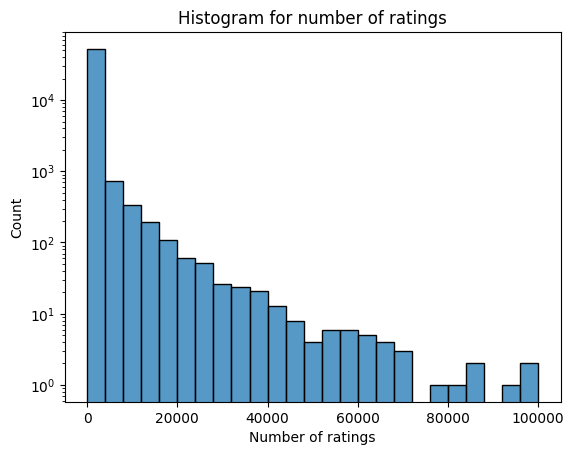

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Making histogram for number of ratings, note logaritmic scale

sns.histplot(df_ratings_count, x="count", binwidth=4000).set(
    title="Histogram for number of ratings", xlabel="Number of ratings"
)
plt.yscale("log")


f) Beräkna genomsnittliga ratings för de top 10 filmerna med flest ratings. Gör ett stapeldiagram över
dessa.

In [13]:
# Merging movie-df with ratings-df
df_movies_merged = pd.merge(df_movies, df_ratings_mean, how = "left", on="movieId")
df_movies_merged = pd.merge(df_movies_merged, df_ratings_count, how = "left", on="movieId")


[Text(0.5, 1.0, 'Rating of ten most ranked movies')]

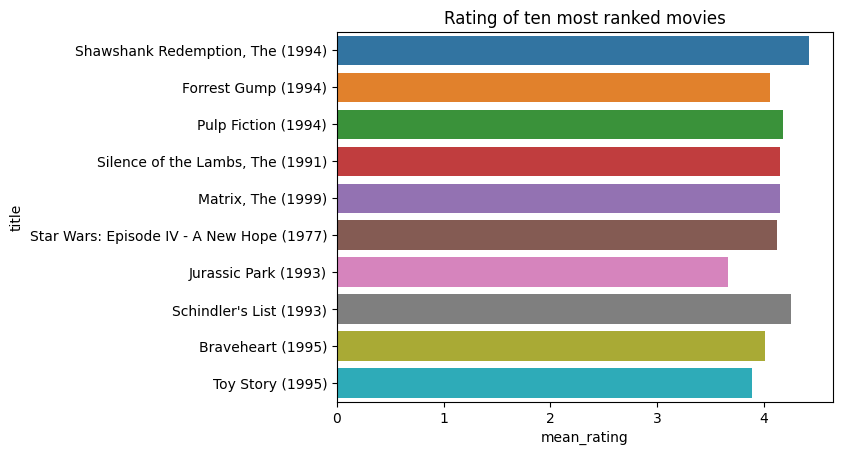

In [14]:
# Barplot over top 10 most rated movies

sns.barplot(
    df_movies_merged.sort_values("count", ascending=False).head(10),
    y="title",
    x="mean_rating",
).set(title="Rating of ten most ranked movies")


1.2 Skapa gles matris  
Likt i videon i uppgift 1.0 skapade du en pivottabell av dataframet med index: "movieId", columns: "userId"  
och values: "ratings". Denna pivottabell är dock "dyr" att skapa och förmodligen kommer inte din dator att  
klara av skapa den om du inte filtrerar bort viss data. Fundera ut ett lämpligt sätt att filtrera ditt dataset,  
pröva dig fram och motivera.
Skapa en gles (sparse) matris av denna pivottabell mha scipy.sparse.csc_matrix().

In [15]:
# Removing movies with less than 100 ratings and less than 3.5 mean rating

f_ratings_dropped = df_ratings_merged.drop(df_ratings_merged[df_ratings_merged["count"]<100].index)
df_ratings_dropped = df_ratings_dropped.drop(df_ratings_dropped[df_ratings_dropped["mean_rating"]<3.5].index)
df_ratings_dropped


,userId,movieId,rating,timestamp,mean_rating,count,title
0,1,307,3.5,1256677221,3.971727,7958,Three Colors: Blue (Trois couleurs: Bleu) (1993)
3,1,1257,4.5,1256677460,3.828617,5902,Better Off Dead... (1985)
4,1,1449,4.5,1256677264,3.918378,6867,Waiting for Guffman (1996)
11,1,3020,4.0,1256677260,3.596107,7783,Falling Down (1993)
12,1,3424,4.5,1256677444,3.834480,7265,Do the Right Thing (1989)
...,...,...,...,...,...,...,...
27753439,283228,8542,4.5,1379882795,3.966567,1002,"Day at the Races, A (1937)"
27753440,283228,8712,4.5,1379882751,3.856944,360,My Favorite Wife (1940)
27753441,283228,34405,4.5,1379882889,3.984000,12531,Serenity (2005)
27753442,283228,44761,4.5,1354159524,3.788885,2816,Brick (2005)


In [16]:
# Creating new dataframe for user mean rating. That is the mean rating per user. 
# Then removing user that has to high (4.2) or too low (2) mean

df_ratings_user_mean = (
    df_ratings_dropped.groupby("userId")["rating"]
    .mean()
    .reset_index(name="user_mean_rating")
)
df_ratings_user_merged = pd.merge(
    df_ratings_dropped, df_ratings_user_mean, how="left", on="userId"
)
df_ratings_user_merged

df_ratings_user_merged_dropped = df_ratings_user_merged.drop(
    df_ratings_user_merged[df_ratings_user_merged["user_mean_rating"] < 2].index
)

df_ratings_user_merged_dropped = df_ratings_user_merged_dropped.drop(
    df_ratings_user_merged_dropped[df_ratings_user_merged_dropped["user_mean_rating"] > 4.2].index
)

df_ratings_user_merged_dropped

# We note that we are now down to 13 million rows

,userId,movieId,rating,timestamp,mean_rating,count,title,user_mean_rating
0,1,307,3.5,1256677221,3.971727,7958,Three Colors: Blue (Trois couleurs: Bleu) (1993),4.200000
1,1,1257,4.5,1256677460,3.828617,5902,Better Off Dead... (1985),4.200000
2,1,1449,4.5,1256677264,3.918378,6867,Waiting for Guffman (1996),4.200000
3,1,3020,4.0,1256677260,3.596107,7783,Falling Down (1993),4.200000
4,1,3424,4.5,1256677444,3.834480,7265,Do the Right Thing (1989),4.200000
...,...,...,...,...,...,...,...,...
16198406,283225,2353,2.5,1139358110,3.556856,18459,Enemy of the State (1998),3.333333
16198407,283225,2599,4.0,1139357994,3.757657,15542,Election (1999),3.333333
16198408,283225,2692,4.0,1139358125,3.974330,21153,Run Lola Run (Lola rennt) (1998),3.333333
16198409,283225,4034,3.5,1139358091,3.798569,19848,Traffic (2000),3.333333


In [71]:
# creating pivot table

pivot_table = df_ratings_user_merged_dropped.pivot(index="movieId", columns="userId", values="rating").fillna(0)
pivot_table

pandas.core.frame.DataFrame

In [89]:
pivot_table.reset_index(inplace=True)

In [90]:
pivot_table

userId,index,movieId,1,2,3,4,6,7,8,11,...,283209,283211,283215,283217,283219,283221,283222,283223,283224,283225
0,0,1,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0
1,1,6,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,11,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,...,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,16,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260,4260,188301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4261,4261,189203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4262,4262,189333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4263,4263,189713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process

# Creating sparse matrix
sparse_matrix = csr_matrix(pivot_table.values)

In [124]:
# Creating and fitting model

model_knn = NearestNeighbors(metric="cosine", algorithm="auto", n_neighbors=20)

model_knn.fit(sparse_matrix)


NearestNeighbors(metric='cosine', n_neighbors=20)

In [125]:
int(df_movies[df_movies["title"].eq("Toy Story (1995)")]["movieId"])

1

In [135]:
int(pivot_table.loc[0]["movieId"])

1

In [136]:
df_movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
58093,193876,The Great Glinka (1946),(no genres listed),1946
58094,193878,Les tribulations d'une caissière (2011),Comedy,2011
58095,193880,Her Name Was Mumu (2016),Drama,2016
58096,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi,2017


In [142]:
int(pivot_table.loc[77]["movieId"])

260

In [159]:
def recommender(movie_name, data, n_recommendations):

    title=process.extractOne(movie_name, df_movies["title"])[0]
    
    # Find movieId of selected movie
    movieid = int(df_movies[df_movies["title"].eq(title)]["movieId"])

    #fin index of sparse matrix for the movieId
    idx = int(pivot_table[pivot_table["movieId"] == movieid]["index"])

    print(f"Movie Selected: {title} MovieId: {movieid}")

    print("Searching for recommendations...")
    indices = model_knn.kneighbors(data[idx], n_neighbors=n_recommendations+1)[1][0]

    for i in indices:
        if i == idx:
            continue
        movieid = int(pivot_table.loc[i]["movieId"])
        print(df_movies[df_movies["movieId"] == movieid]["title"].to_string())

recommender("star wars", sparse_matrix, 10)



Movie Selected: Star Wars: Episode IV - A New Hope (1977) MovieId: 260
Searching for recommendations...
1171    Star Wars: Episode V - The Empire Strikes Back...
1184    Star Wars: Episode VI - Return of the Jedi (1983)
1173    Raiders of the Lost Ark (Indiana Jones and the...
583    Terminator 2: Judgment Day (1991)
537    Blade Runner (1982)
476    Jurassic Park (1993)
587    Silence of the Lambs, The (1991)
843    Godfather, The (1972)
602    Fargo (1996)
293    Pulp Fiction (1994)
